In [6]:
# !pip install wordcloud
# !pip install matplotlib

In [84]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
import sklearn
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.model_selection import train_test_split

 # 2.1 Визуализация зависимости переменных

In [2]:
df = pd.read_csv('../Session1/dataset_for_learning.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,category,empl,sence,text
0,0,0,благоустройство территории,исполнительный,NaN,трасс нижнекамск чистопол лесополос пгт камск ...
1,1,1,благоустройство территории,исполнительный,NaN,двор дом ленинградск отсутствова парковочн мес...
2,2,2,содержание и ремонт муниципальных дорог,администрация,NaN,добр ден осуществля уборк снег центр город гос...
3,3,3,благоустройство территории,администрация,NaN,добр ден осуществля вывоз мусор территор жил д...
4,4,4,содержание и ремонт муниципальных дорог,администрация,NaN,дан участок проезж част халитов дом халитов дв...


In [3]:
df.category.replace({'текущее содержание многоквартирного дома':'жкх'}, inplace=True)
df.category.replace({'СПАМ':'другое'}, inplace=True)
df.category.replace({'безопасность':'другое'}, inplace=True)

In [30]:

df.category.value_counts()


благоустройство территории                 11771
содержание и ремонт муниципальных дорог     6728
организация дорожного движения              1735
другое                                       197
здравоохранение                              197
уборка снега                                 191
жкх                                          173
Name: category, dtype: int64

In [25]:
df.sence.value_counts()

плохо         38
хорошо        14
нейтрально    13
ужасно         7
отлично        4
Name: sence, dtype: int64

<span style="color:blue">**Визуализация распределний без учета класса целевой переменной**</span>.

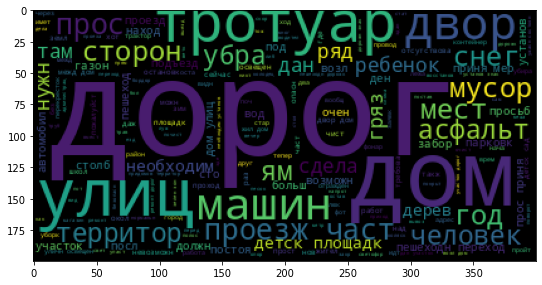

In [20]:
def word_cloud_vis(text_df):
    '''Визуализация часто встречаемых слов с помощью облака слов'''
    plt.figure(figsize=(9, 5));
    plt.imshow(WordCloud().generate(''.join(text_df)))

word_cloud_vis(df.text)

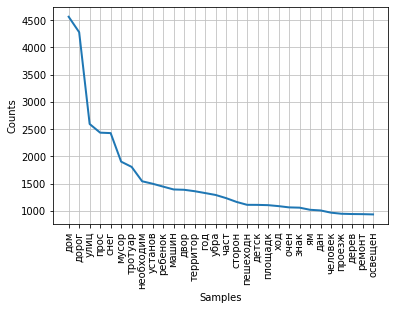

In [22]:
def word_statistics(text_df):
    '''Визуализация распределения слов с помощью графика'''
    nltk.probability.FreqDist(nltk.Text(nltk.word_tokenize(''.join(text_df)))).plot(30, cumulative=False)

word_statistics(df.text)

<span style="color:blue">**Визуализация распределний c учетом класса целевой переменной**</span>.

In [33]:
target = df.category.value_counts().index.tolist()

In [38]:
target

['благоустройство территории',
 'содержание и ремонт муниципальных дорог',
 'организация дорожного движения',
 'другое',
 'здравоохранение',
 'уборка снега',
 'жкх']

<span style="color:blue">**Визуализация распределний для "благоустройство территории"**</span>.

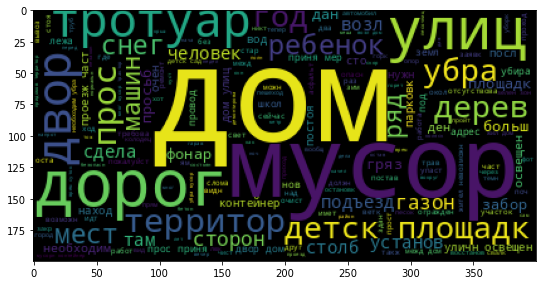

In [40]:
word_cloud_vis(df[df.category==target[0]].text)

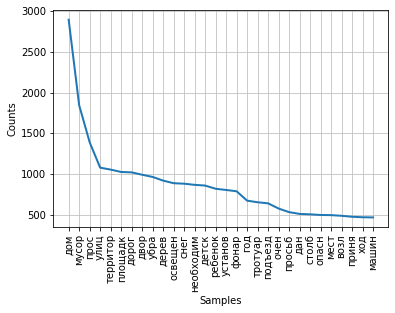

In [41]:
word_statistics(df[df.category==target[0]].text)

<span style="color:blue">**Визуализация распределний для "содержание и ремонт муниципальных дорог"**</span>.

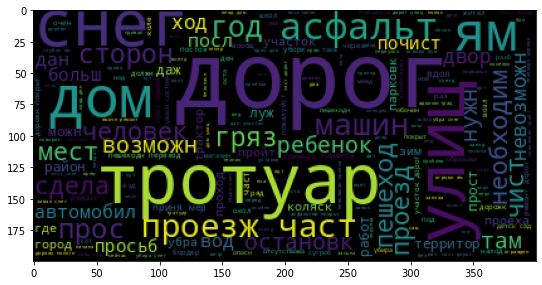

In [46]:
word_cloud_vis(df[df.category==target[1]].text)

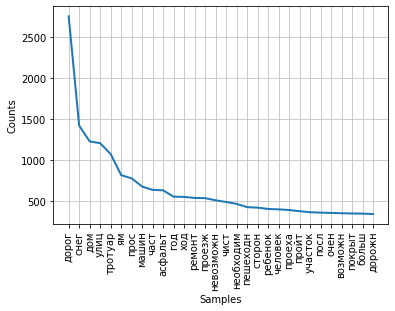

In [47]:
word_statistics(df[df.category==target[1]].text)

<span style="color:blue">**Визуализация распределний для "организация дорожного движения"**</span>.

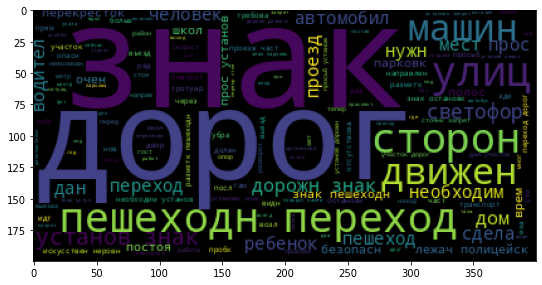

In [48]:
word_cloud_vis(df[df.category==target[2]].text)

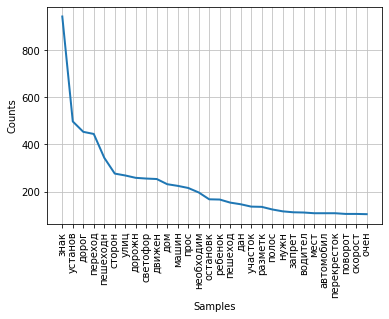

In [49]:
word_statistics(df[df.category==target[2]].text)

<span style="color:blue">**Визуализация распределний для "другое"**</span>.

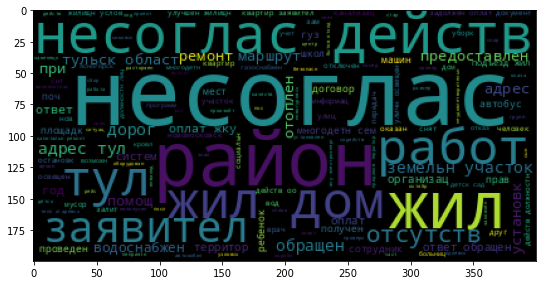

In [54]:
word_cloud_vis(df[df.category==target[3]].text)

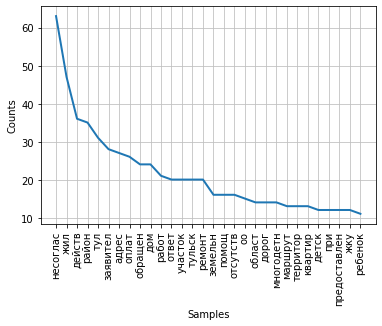

In [55]:
word_statistics(df[df.category==target[3]].text)

<span style="color:blue">**Визуализация распределний для "здравоохранение"**</span>.

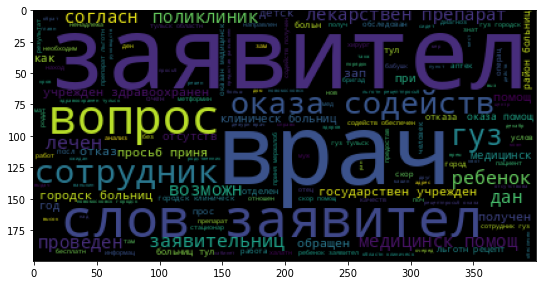

In [56]:
word_cloud_vis(df[df.category==target[4]].text)

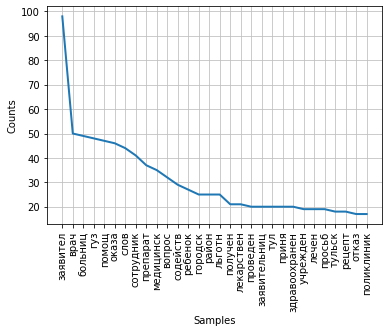

In [57]:
word_statistics(df[df.category==target[4]].text)

<span style="color:blue">**Визуализация распределний для "уборка снега"**</span>.

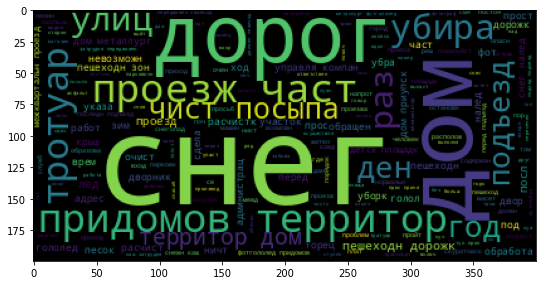

In [58]:
word_cloud_vis(df[df.category==target[5]].text)

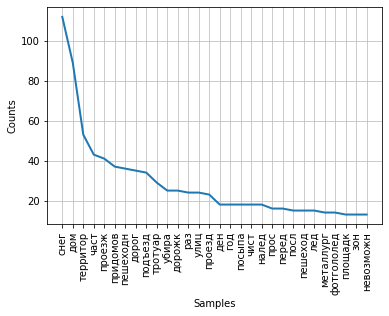

In [59]:
word_statistics(df[df.category==target[5]].text)

<span style="color:blue">**Визуализация распределний для "жкх"**</span>.

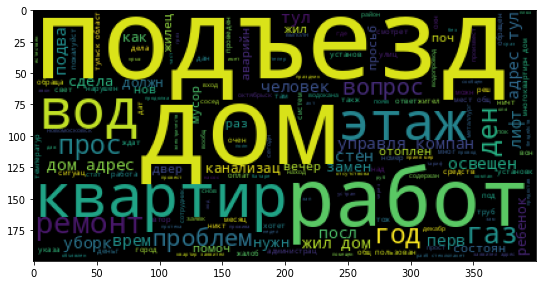

In [60]:
word_cloud_vis(df[df.category==target[6]].text)

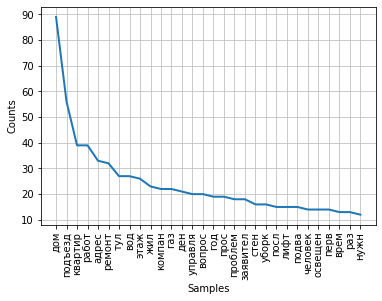

In [61]:
word_statistics(df[df.category==target[6]].text)

<span style="color:blue">**Видно, что задача эмоциональной окраски будет решаться плохо, так как много слов из предметной области**</span>.

In [62]:
target = df.sence.value_counts().index.tolist()

In [63]:
target

['плохо', 'хорошо', 'нейтрально', 'ужасно', 'отлично']

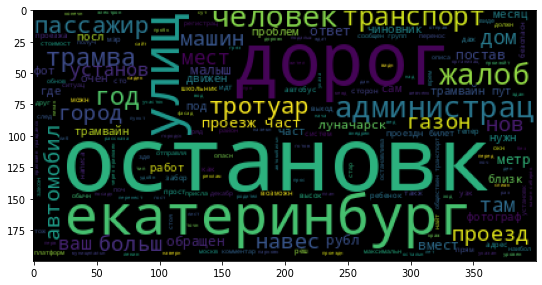

In [65]:
word_cloud_vis(df[df.sence == target[0]].text)

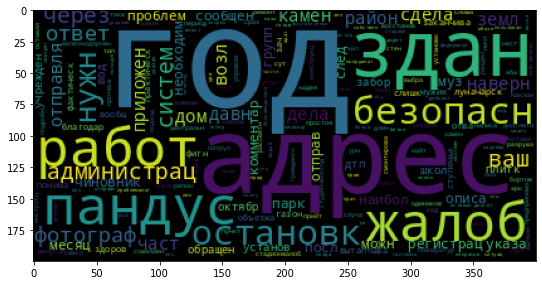

In [66]:
word_cloud_vis(df[df.sence == target[1]].text)

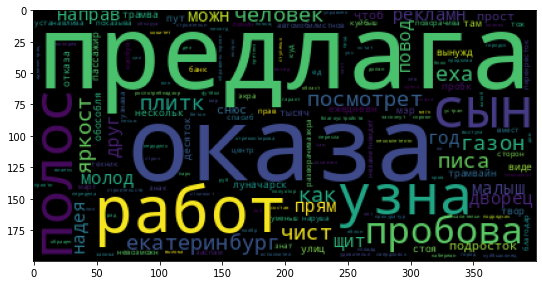

In [67]:
word_cloud_vis(df[df.sence == target[3]].text)

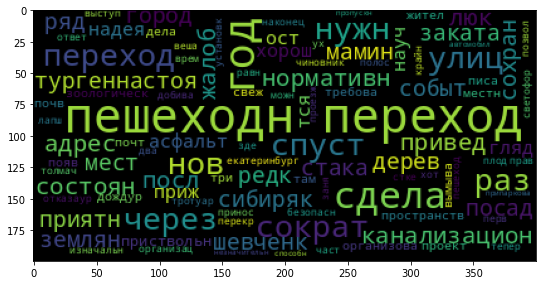

In [68]:
word_cloud_vis(df[df.sence == target[4]].text)

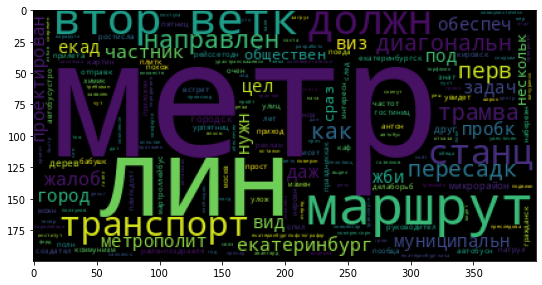

In [69]:
word_cloud_vis(df[df.sence == target[2]].text)

<span style="color:blue">**Выводы: для визуализации переменных и их влияния были выбраны облако слов и график распределния (облако слов хорошо подходит для наглядности, график демонстрирует частоту слов).
    Видно, что для категории "благоустройство территории" чаще встречаются слова дом, мусор, улица, а "ремонт дорог" - дорога, тратуар, снег, асфальт и т.д.
    В случае эмоциональной окраски текста - такой явной зависимости нет**</span>.

# 2.2 Выбор переменных

<span style="color:blue">Выбор переменных будет происходить следующим образом: проанализировав график ниже, видно, что функция распределеня слов стремительно снижается **к нулю** при 1000 словах, пэтому не имеет смысла рассматривать количество больше **1000**, поэтому опредлеим 1_000 часто встречаемых слов - **таким образом будеи происходить выбор переменных из исходного набора данных**</span>.

<span style="color:blue"> Преобразовывать исходные переменные будем через **tf-idf**: создадим словарь значимых слов и посчитаем количества вхождений слов в документ и частоту повлений в корпусе и выполним произведение этих величин.</span>.

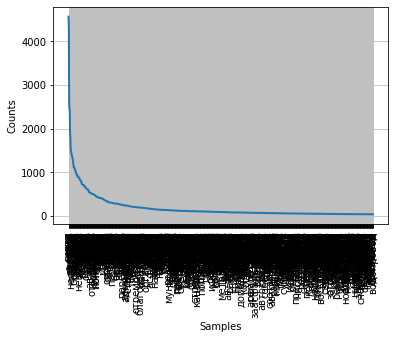

In [4]:
def word_statistics(text_df):
    '''Визуализация распределения слов с помощью графика'''
    nltk.probability.FreqDist(nltk.Text(nltk.word_tokenize(''.join(text_df)))).plot(1_000, cumulative=False)

word_statistics(df.text)

In [98]:
# количество уникальных слов в корпусе
len(set(''.join(df.text).split()))

30999

In [5]:
tf_idf_vect = sklearn.feature_extraction.text.TfidfVectorizer(
    lowercase=True, 
    analyzer='word', 
#     ngram_range=(1, 2), 
    max_features=1_000  # Выбираем 1000 наиболее часто встречаемых слов
)
tf_idf_vect.fit(df.text.values)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=1000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [6]:
tf_idf_vect.transform(df.text.values)

<20992x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 205263 stored elements in Compressed Sparse Row format>

In [7]:
# Напишем функцию получения новых признаков:

def new_feature(text):
    return tf_idf_vect.transform(text)


new_feature(df.text.values)

<20992x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 205263 stored elements in Compressed Sparse Row format>

# 2.3 Исключение незначащих переменных

<span style="color:blue"> Используя встроенную утилиту SelectKBest проведем ряд статистических тестов хи-квадрат, которые помогут выявить значимые перменные</span>.

In [15]:
tf_idf_old = new_feature(df.text.values)
select = SelectKBest(chi2, k=500).fit(tf_idf_old, df.category.values)
tf_idf_new = select.transform(tf_idf_old)

<span style="color:blue"> Выведем на экран оценки значимости переменных.</span>.

In [41]:
select.scores_

array([9.73263403e+00, 1.67140371e+01, 1.81028069e+01, 3.54700585e+01,
       1.05528577e+01, 7.07368309e+00, 3.90647084e+01, 7.62833269e+00,
       8.54705741e+00, 1.06288035e+01, 1.43081048e+01, 3.49682015e+00,
       8.37855531e+01, 8.20269252e+00, 1.13126607e+00, 1.27181754e+01,
       2.47733277e+00, 1.32201103e+01, 2.47674883e+02, 1.91244234e+01,
       2.44296364e+01, 4.15016649e+01, 2.56556011e+01, 4.40820928e+00,
       3.94189351e+00, 2.73923844e+00, 2.17078414e+01, 3.19954639e+01,
       9.58686568e+00, 7.33876636e+00, 7.61578619e+00, 1.42437952e+01,
       6.97280745e+00, 1.04217153e+03, 2.35291397e+01, 6.01035325e+01,
       2.36811614e+00, 7.69996710e-01, 2.98836592e+01, 4.33770988e+00,
       3.57447948e+00, 2.04325426e+01, 2.37999252e+01, 2.59709803e+00,
       3.23383127e+00, 1.09083543e+00, 1.56708332e+01, 6.14985336e+00,
       1.09379316e+01, 3.57900705e+00, 7.18744745e+00, 1.26557525e+01,
       2.12281651e+00, 1.96118195e+01, 2.07803715e+00, 1.60292070e+01,
      

<span style="color:blue"> Отобразим словарь исходного датасета после tf-idf.</span>.

In [39]:
tf_idf_vect.vocabulary_

{'трасс': 896,
 'нижнекамск': 424,
 'над': 381,
 'проезж': 666,
 'част': 968,
 'опасн': 484,
 'дерев': 162,
 'снегопад': 797,
 'проход': 684,
 'автотранспорт': 9,
 'двор': 151,
 'дом': 174,
 'отсутствова': 514,
 'парковочн': 529,
 'мест': 357,
 'жител': 198,
 'постоя': 622,
 'проезд': 665,
 'неоднократн': 411,
 'происход': 673,
 'дтп': 183,
 'сторон': 848,
 'запрет': 222,
 'оставля': 499,
 'машин': 352,
 'согласн': 810,
 'установ': 940,
 'знак': 249,
 'авт': 2,
 'фот': 951,
 'добр': 168,
 'ден': 160,
 'осуществля': 504,
 'уборк': 918,
 'снег': 796,
 'центр': 964,
 'город': 126,
 'гост': 129,
 'парковк': 528,
 'движен': 150,
 'крайн': 307,
 'затрудн': 230,
 'вывоз': 96,
 'мусор': 374,
 'территор': 875,
 'жил': 195,
 'адрес': 12,
 'обрат': 452,
 'дан': 145,
 'участок': 947,
 'видет': 62,
 'односторон': 475,
 'убира': 917,
 'ситуац': 775,
 'год': 119,
 'прос': 678,
 'устран': 942,
 'закрас': 213,
 'пол': 589,
 'возл': 75,
 'площадк': 560,
 'похож': 628,
 'каток': 280,
 'заб': 201,
 'почис

<span style="color:blue"> Отобразим переменные, которые были отобраны при тесте хи-квадрат на значимость их количество нового соваря</span>.

In [45]:
np.array(tf_idf_vect.get_feature_names())[select.get_support()]

array(['аварийн', 'авт', 'автобус', 'автомобил', 'администрац', 'адрес',
       'антисанитар', 'арматур', 'асфальт', 'асфальтирова', 'асфальтн',
       'асфальтов', 'бак', 'безопасн', 'бетон', 'блок', 'больниц',
       'больш', 'бордюр', 'бутылк', 'бытов', 'валя', 'вдол', 'вернут',
       'весн', 'ветв', 'ветер', 'ветк', 'вечер', 'вид', 'видет', 'видн',
       'висет', 'вод', 'водител', 'водокана', 'возл', 'возможн', 'вообщ',
       'вопрос', 'восстановлен', 'врач', 'встречн', 'втор', 'вход',
       'входн', 'въезд', 'выбоин', 'вывезт', 'вывоз', 'выезд', 'выезжа',
       'выеха', 'вынужд', 'газон', 'гараж', 'главн', 'глубин', 'глубок',
       'год', 'голол', 'гололед', 'горет', 'горк', 'городск', 'гост',
       'граффит', 'грузов', 'групп', 'гряз', 'гуз', 'даж', 'дан', 'дат',
       'двер', 'двига', 'движен', 'двор', 'дворник', 'действ', 'декабр',
       'демонтирова', 'дерев', 'деревн', 'деревя', 'детск', 'добр',
       'дожд', 'дом', 'дополнительн', 'дорог', 'дорожк', 'дорожн', 'доск

In [47]:
len(np.array(tf_idf_vect.get_feature_names())[select.get_support()])

500

<span style="color:blue"> Выполним данный пайплайн для эмоциональной окраски и схраним датасеты.</span>.

In [82]:
def feature_selection(tf_idf_old, category):
    return SelectKBest(chi2, k=500).fit_transform(tf_idf_old, category)


pd.concat([pd.DataFrame(feature_selection(tf_idf_old, df.category.values).toarray()), 
           pd.DataFrame(df.category)], axis=1).to_csv('category.csv')


pd.concat(
    [pd.DataFrame(feature_selection(
        sklearn.feature_extraction.text.TfidfVectorizer(
            lowercase=True, analyzer='word', max_features=1_000
        ).fit_transform(df[['sence', 'text']].dropna()['text']), df[['sence', 'text']].dropna()['sence'].values
    ).toarray()),
           pd.DataFrame(df[['sence', 'text']].dropna()['sence']).reset_index()], 
    axis=1).to_csv('sence.csv')



pd.concat(
    [pd.DataFrame(feature_selection(
        sklearn.feature_extraction.text.TfidfVectorizer(
            lowercase=True, analyzer='word', max_features=1_000
        ).fit_transform(df[['empl', 'text']].dropna()['text']), df[['empl', 'text']].dropna()['empl'].values
    ).toarray()),
           pd.DataFrame(df[['empl', 'text']].dropna()['empl']).reset_index()], 
    axis=1).to_csv('empl.csv')

# 2.4 Разбиение выборки

<span style="color:blue"> Покажем разбиение выборки на обучающую и тестовую. Обычно на тест оставляют не менее 20% выборки, остальная часть предназанчается для обучения и валидации на каждой эпохе. Такой подход позволит выявить переобучение параметров и гиперпараметров</span>.

In [95]:
df_train = pd.read_csv('category.csv')
X_train, y_train, X_test, y_test = train_test_split(df_train.iloc[:, 1:-1], df_train.category, test_size=0.33)